In [1]:
import os
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import datetime as dttm
import romer_utils as ru

In [4]:
def linfunc(x, a):
    return a * x
def affine(x, a, b):
    return a * x + b
fitfunc = affine

In [5]:
ye=[]
xe=[]
for n in range(1,len(ru.EMERGS)):
    ye.append((ru.EMERGS[n].t - ru.EMERGS[0].t).total_seconds()/n)
    xe.append((ru.EMERGS[n].d - ru.EMERGS[0].d)/n)
xe=np.array(xe[:])
ye=np.array(ye[:])
pars_e, err_e = curve_fit(fitfunc, xe, ye)

In [6]:
xo=[]
yo=[]
for n in range(1,len(ru.OCCULS)):
    yo.append((ru.OCCULS[n].t - ru.OCCULS[0].t).total_seconds()/n)
    xo.append((ru.OCCULS[n].d - ru.OCCULS[0].d)/n)
xo=np.array(xo)
yo=np.array(yo)
pars_o,err_o = curve_fit(fitfunc, xo, yo)

<Figure size 432x288 with 0 Axes>

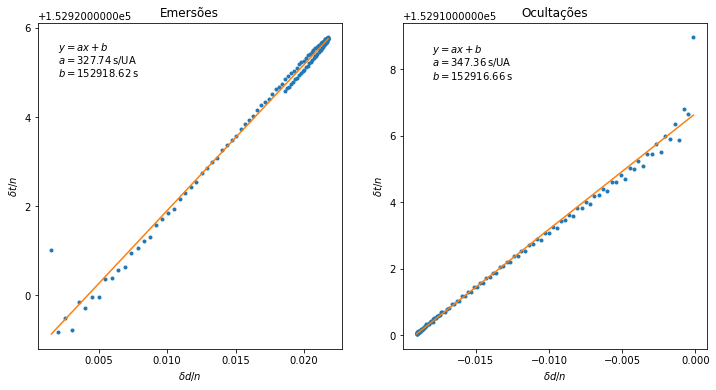

In [7]:
xce = np.linspace(xe.min(), xe.max(), 2)
yce = fitfunc(xce, *pars_e)
xco = np.linspace(xo.min(), xo.max(), 2)
yco = fitfunc(xco, *pars_o)

plt.tight_layout();
fig, axs = plt.subplots(1,2, figsize=(12,6));
axs[0].locator_params(axis='both', nbins=6);
axs[1].locator_params(axis='both', nbins=6);
axs[0].set_xlabel(r"$\delta d/n$")
axs[0].set_ylabel(r"$\delta t/n$")
axs[0].plot(xe,ye,'.', xce,yce);
axs[1].set_xlabel(r"$\delta d/n$")
axs[1].set_ylabel(r"$\delta t/n$")
axs[1].plot(xo,yo,'.', xco,yco);
axs[0].set_title("Emersões")
axs[1].set_title("Ocultações")
axs[0].text(0.002,152925.5,r"$y=ax+b$")
axs[0].text(0.002,152925.2,r"$a={:.2f}\,$s/UA".format(pars_e[0]))
axs[0].text(0.002,152924.9,r"$b={:.2f}\,$s".format(pars_e[1]))
axs[1].text(-0.018,152918.5,r"$y=ax+b$")
axs[1].text(-0.018,152918.1,r"$a={:.2f}\,$s/UA".format(pars_o[0]))
axs[1].text(-0.018,152917.7,r"$b={:.2f}\,$s".format(pars_o[1]))
plt.savefig("f.png",dpi=300)

In [8]:
ru.AU/pars_o[0]

430673623.1708425

In [9]:
ye=[]
xe=[]
for n in range(0,len(ru.EMERGS)):
    for k in range(n+1,len(ru.EMERGS)):
        ye.append((ru.EMERGS[k].t - ru.EMERGS[n].t).total_seconds()/(k-n))
        xe.append((ru.EMERGS[k].d - ru.EMERGS[n].d)/(k-n))
xe=np.array(xe[:])
ye=np.array(ye[:])
pars_e, err_e = curve_fit(fitfunc, xe, ye)
xce = np.array([xe.min(), xe.max()])
yce = fitfunc(xce,*pars_e)

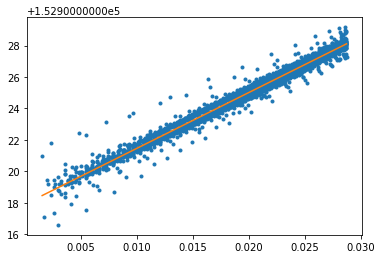

In [10]:
plt.plot(xe,ye,'.',xce,yce,'-');

In [11]:
ru.AU/pars_e[0]

421374624.3084975

In [12]:
yo=[]
xo=[]
for n in range(0,len(ru.OCCULS)):
    for k in range(n+1,len(ru.OCCULS)):
        yo.append((ru.OCCULS[k].t - ru.OCCULS[n].t).total_seconds()/(k-n))
        xo.append((ru.OCCULS[k].d - ru.OCCULS[n].d)/(k-n))
xo=np.array(xo[:])
yo=np.array(yo[:])
pars_o, err_o = curve_fit(fitfunc, xo, yo)
xco = np.array([xo.min(), xo.max()])
yco = fitfunc(xco,*pars_o)

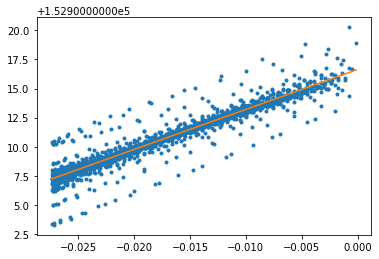

In [13]:
plt.plot(xo,yo,'.',xco,yco,'-');

In [14]:
ru.AU/pars_o[0]

435186110.0894964